### 주택 데이터셋을 사용한 비선형 관계 모델링

In [15]:
# 주택 데이터셋 로드
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                 'python-machine-learning-book-3rd-edition/'
                 'master/ch10/housing.data.txt',
                 header=None,
                 sep='\s+')

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [16]:
from sklearn.linear_model import LinearRegression

X = df[['LSTAT']].values
y = df['MEDV'].values

regr = LinearRegression()

In [17]:
from sklearn.preprocessing import PolynomialFeatures

# 이차, 삼차 다항식 특성을 만듭니다
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

In [18]:
import numpy as np
from sklearn.metrics import r2_score

# 학습된 모델을 그리기 위해 특성 범위를 만듭니다
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]

regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))

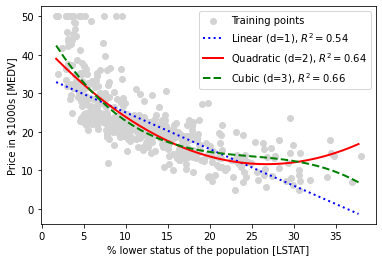

In [19]:
import matplotlib.pyplot as plt

# 결과 그래프를 그립니다
plt.scatter(X, y, label='Training points', color='lightgray')

plt.plot(X_fit, y_lin_fit, 
         label='Linear (d=1), $R^2=%.2f$' % linear_r2, 
         color='blue', 
         lw=2, 
         linestyle=':')

plt.plot(X_fit, y_quad_fit, 
         label='Quadratic (d=2), $R^2=%.2f$' % quadratic_r2,
         color='red', 
         lw=2,
         linestyle='-')

plt.plot(X_fit, y_cubic_fit, 
         label='Cubic (d=3), $R^2=%.2f$' % cubic_r2,
         color='green', 
         lw=2, 
         linestyle='--')

plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')
plt.legend(loc='upper right')
plt.show()

In [29]:
# 특성을 변환합니다
X_log = np.log(X)
y_sqrt = np.sqrt(y)

# 학습된 모델을 그리기 위해 특성 범위를 만듭니다
X_fit = np.arange(X_log.min()-1, 
                  X_log.max()+1, 1)[:, np.newaxis]

regr = regr.fit(X_log, y_sqrt)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y_sqrt, regr.predict(X_log))

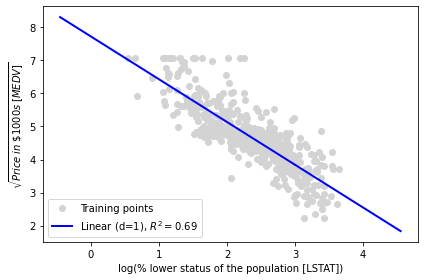

In [30]:
# 결과 그래프를 그립니다
plt.scatter(X_log, y_sqrt, 
            label='Training points', 
            color='lightgray')

plt.plot(X_fit, y_lin_fit, 
         label='Linear (d=1), $R^2=%.2f$' % linear_r2, 
         color='blue', 
         lw=2)

plt.xlabel('log(% lower status of the population [LSTAT])')
plt.ylabel('$\sqrt{Price \; in \; \$1000s \; [MEDV]}$')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

### LAB

In [31]:
from sklearn.model_selection import train_test_split

X = df[['RM', 'LSTAT']].values
y = df['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [32]:
# RM만
X_train_RM = X_train[:, 0].reshape(-1, 1)
X_test_RM = X_test[:, 0].reshape(-1, 1)

# LSTAT만
X_train_LSTAT = X_train[:, 1].reshape(-1, 1)
X_test_LSTAT = X_test[:, 1].reshape(-1, 1)

In [33]:
def make_train_features(X_train, y_train):
    X_train_quad = X_train_quad = quadratic.fit_transform(X_train) # 이차 다항
    X_train_cubic = cubic.fit_transform(X_train) # 삼차 다항
    X_train_log = np.log(X_train) # 로그 변환
    y_train_sqrt = np.sqrt(y_train) # 로그 변환
    return X_train_quad, X_train_cubic, X_train_log, y_train_sqrt

def make_test_features(X_test, y_test):
    X_test_quad = quadratic.transform(X_test) # 이차 다항
    X_test_cubic = cubic.transform(X_test) # 삼차 다항
    X_test_log = np.log(X_test) # 로그 변환
    y_test_sqrt = np.sqrt(y_test) # 로그 변환     
    return X_test_quad, X_test_cubic, X_test_log, y_test_sqrt

In [34]:
from sklearn.preprocessing import PolynomialFeatures

# 이차, 삼차 다항식 특성을 만듭니다
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)

X_train_quad, X_train_cubic, X_train_log, y_train_sqrt = make_train_features(X_train, y_train)
X_test_quad, X_test_cubic, X_test_log, y_test_sqrt = make_train_features(X_test, y_test)

### RM, LSTAT 모두 사용

In [35]:
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

regr = LinearRegression()

# 선형 모델
regr = regr.fit(X_train, y_train)
linear_r2_test = r2_score(y_test, regr.predict(X_test))

# 이차 다항 모델
regr = regr.fit(X_train_quad, y_train)
quadratic_r2_test = r2_score(y_test, regr.predict(X_test_quad))

# 삼차 다항 모델
regr = regr.fit(X_train_cubic, y_train)
cubic_r2_test = r2_score(y_test, regr.predict(X_test_cubic))

# 로그 변환 모델
regr = regr.fit(X_train_log, y_train_sqrt)
log_r2_test = r2_score(y_test_sqrt, regr.predict(X_test_log))

### RM 만 사용

In [36]:
X_train_RM_quad, X_train_RM_cubic, X_train_RM_log, y_train_RM_sqrt = make_train_features(X_train_RM, y_train)
X_test_RM_quad, X_test_RM_cubic, X_test_RM_log, y_test_RM_sqrt = make_train_features(X_test_RM, y_test)

# 선형 모델
regr = regr.fit(X_train_RM, y_train)
linear_r2_test_RM = r2_score(y_test, regr.predict(X_test_RM))

# 이차 다항 모델
regr = regr.fit(X_train_RM_quad, y_train)
quadratic_r2_test_RM = r2_score(y_test, regr.predict(X_test_RM_quad))

# 삼차 다항 모델
regr = regr.fit(X_train_RM_cubic, y_train)
cubic_r2_test_RM = r2_score(y_test, regr.predict(X_test_RM_cubic))

# 로그 변환 모델
regr = regr.fit(X_train_RM_log, y_train_RM_sqrt)
log_r2_test_RM = r2_score(y_test_RM_sqrt, regr.predict(X_test_RM_log))

### LSTAT 만 사용

In [37]:
X_train_LSTAT_quad, X_train_LSTAT_cubic, X_train_LSTAT_log, y_train_LSTAT_sqrt = make_train_features(X_train_LSTAT, y_train)
X_test_LSTAT_quad, X_test_LSTAT_cubic, X_test_LSTAT_log, y_test_LSTAT_sqrt = make_train_features(X_test_LSTAT, y_test)
 
# 선형 모델
regr = regr.fit(X_train_LSTAT, y_train)
linear_r2_test_LSTAT = r2_score(y_test, regr.predict(X_test_LSTAT))

# 이차 다항 모델
regr = regr.fit(X_train_LSTAT_quad, y_train)
quadratic_r2_test_LSTAT = r2_score(y_test, regr.predict(X_test_LSTAT_quad))

# 삼차 다항 모델
regr = regr.fit(X_train_LSTAT_cubic, y_train)
cubic_r2_test_LSTAT = r2_score(y_test, regr.predict(X_test_LSTAT_cubic))

# 로그 변환 모델
regr = regr.fit(X_train_LSTAT_log, y_train_LSTAT_sqrt)
log_r2_test_LSTAT = r2_score(y_test_LSTAT_sqrt, regr.predict(X_test_LSTAT_log))

In [38]:
print('---------RM과 LSTAT 특성 사용---------')
print('선형 모델:', linear_r2_test)
print('이차 다항 모델:', quadratic_r2_test)
print('삼차 다항 모델:', cubic_r2_test)
print('로그 변환 모델:', log_r2_test)
print('\n---------RM만 사용---------')
print('RM만 사용) 선형 모델:', linear_r2_test_RM)
print('RM만 사용) 이차 다항 모델:', quadratic_r2_test_RM)
print('RM만 사용) 삼차 다항 모델:', cubic_r2_test_RM)
print('RM만 사용) 로그 변환 모델:', log_r2_test_RM)
print('\n---------LSTAT만 사용---------')
print('LSTAT만 사용) 선형 모델:', linear_r2_test_LSTAT)
print('LSTAT만 사용) 이차 다항 모델:', quadratic_r2_test_LSTAT)
print('LSTAT만 사용) 삼차 다항 모델:', cubic_r2_test_LSTAT)
print('LSTAT만 사용) 로그 변환 모델:', log_r2_test_LSTAT)

---------RM과 LSTAT 특성 사용---------
선형 모델: 0.6069792285352371
이차 다항 모델: 0.7141004599281672
삼차 다항 모델: 0.7096426755514486
로그 변환 모델: 0.6667216085812738

---------RM만 사용---------
RM만 사용) 선형 모델: 0.43514364832115193
RM만 사용) 이차 다항 모델: 0.5091378251168543
RM만 사용) 삼차 다항 모델: 0.5049156410773732
RM만 사용) 로그 변환 모델: 0.3589478168470216

---------LSTAT만 사용---------
LSTAT만 사용) 선형 모델: 0.5218049526125568
LSTAT만 사용) 이차 다항 모델: 0.5964427754767518
LSTAT만 사용) 삼차 다항 모델: 0.6145861618613087
LSTAT만 사용) 로그 변환 모델: 0.6637941238941023
